In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import numpy as np
import tensorflow as tf
from numpy import loadtxt
import keras
from keras.layers import Dense, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
# mount drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv("/content/drive/MyDrive/CS3244 Project/data_full.csv")
data = data.drop(data.columns[[0]], axis=1)
data = data.replace([np.inf, -np.inf], np.nan).dropna(how="any")

In [5]:
X = data.iloc[:, :76].values
sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
label_y = data.iloc[:, 76].values
le = LabelEncoder()
label_y = le.fit_transform(label_y)

In [53]:
output_label = ['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack Brute Force',
       'Web Attack Sql Injection', 'Web Attack XSS']

In [49]:
le.inverse_transform(list(range(15)))

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack <U+0096> Brute Force',
       'Web Attack <U+0096> Sql Injection', 'Web Attack <U+0096> XSS'],
      dtype=object)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, label_y, train_size = 2/3)

In [11]:
# 1 dimensional
splitted_y_train = y_train
splitted_y_test = y_test

In [12]:
y_train = pd.get_dummies(y_train, columns=["Label"])
y_test = pd.get_dummies(y_test, columns=["Label"])

In [ ]:
y

,BENIGN,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,Heartbleed,Infiltration,PortScan,SSH-Patator,Web Attack <U+0096> Brute Force,Web Attack <U+0096> Sql Injection,Web Attack <U+0096> XSS
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2827872,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2827873,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2827874,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# doesnt work for large dataset
ohe = OneHotEncoder()
y = data.iloc[:, 76].values
y = ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim = 76, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(25, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation= "relu"))
model.add(Dense(15, activation= "softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred, test)
print('Accuracy is:', a*100)

Accuracy is: 99.94905079414306


In [ ]:
history = model.fit(data_train, y_train, validation_data = (data_test,y_test), epochs=100, batch_size= 1000)

Epoch 1/100
2263/2263 [==============================] - 10s 4ms/step - loss: 0.1645 - accuracy: 0.9432 - val_loss: 0.1109 - val_accuracy: 0.9641
Epoch 2/100
2263/2263 [==============================] - 9s 4ms/step - loss: 0.1649 - accuracy: 0.9427 - val_loss: 0.1112 - val_accuracy: 0.9640
Epoch 3/100
2263/2263 [==============================] - 9s 4ms/step - loss: 0.1647 - accuracy: 0.9430 - val_loss: 0.1105 - val_accuracy: 0.9638
Epoch 4/100
2263/2263 [==============================] - 9s 4ms/step - loss: 0.1646 - accuracy: 0.9435 - val_loss: 0.1105 - val_accuracy: 0.9638
Epoch 5/100
2263/2263 [==============================] - 9s 4ms/step - loss: 0.1630 - accuracy: 0.9442 - val_loss: 0.1107 - val_accuracy: 0.9640
Epoch 6/100
2263/2263 [==============================] - 9s 4ms/step - loss: 0.1623 - accuracy: 0.9444 - val_loss: 0.1092 - val_accuracy: 0.9637
Epoch 7/100
2263/2263 [==============================] - 9s 4ms/step - loss: 0.1621 - accuracy: 0.9448 - val_loss: 0.1090 - val_a

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

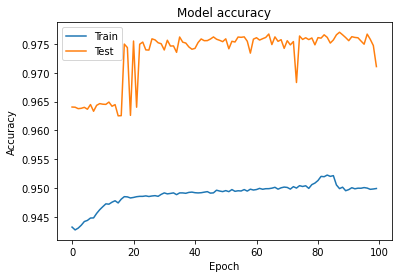

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

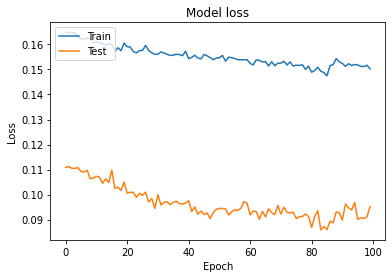

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/CS3244 Project/100_model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS3244 Project/100_model/assets


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [1]:
from tensorflow import keras
loaded_model = keras.models.load_model('/content/drive/MyDrive/CS3244 Project/100_model')

In [13]:
test_pred = np.argmax(loaded_model.predict(x_test), axis = 1)

In [ ]:
train_pred

array([0, 4, 0, ..., 3, 0, 4])

In [ ]:
y_train.idxmax()

BENIGN                                759459
Bot                                   626429
DDoS                                   23043
DoS GoldenEye                        2751134
DoS Hulk                             2313061
DoS Slowhttptest                     2207444
DoS slowloris                        2191896
FTP-Patator                          1712737
Heartbleed                           2732443
Infiltration                         1416842
PortScan                              335478
SSH-Patator                          1890161
Web Attack <U+0096> Brute Force      1570252
Web Attack <U+0096> Sql Injection    1612031
Web Attack <U+0096> XSS              1606118
dtype: int64

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay, recall_score, f1_score
cm = confusion_matrix(splitted_y_test, test_pred)
#accuracy_score(splitted_y_train, train_pred)
#precision_score(splitted_y_train, train_pred, average = "micro")
precision_score(splitted_y_test, test_pred, average = None, zero_division = 0)

array([0.9715731 , 0.        , 0.99765503, 0.96581197, 0.94526975,
       0.66729679, 0.        , 0.        , 0.        , 0.        ,
       0.98083659, 0.        , 0.        , 0.        , 0.        ])

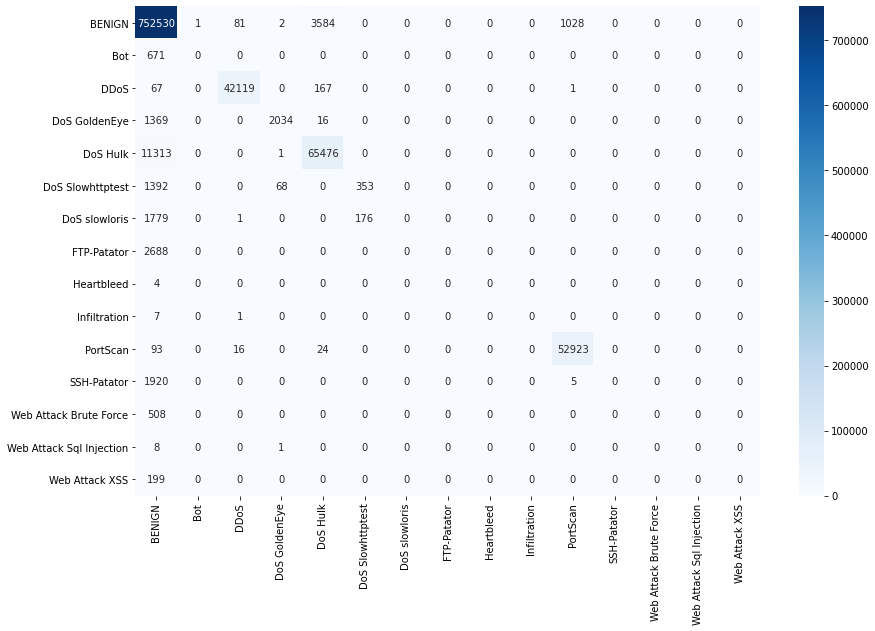

In [64]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (14,9))
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, xticklabels = output_label, yticklabels= output_label, fmt = "d", cmap='Blues')

In [39]:
cm

array([[1504650,       1,     148,       6,    7244,       1,       0,
              0,       0,       0,    2044,       0,       0,       0,
              0],
       [   1285,       0,       0,       0,       0,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0],
       [    125,       0,   85207,       0,     338,       0,       0,
              0,       0,       0,       1,       0,       0,       0,
              0],
       [   2797,       0,       0,    4049,      28,       0,       0,
              0,       0,       0,       0,       0,       0,       0,
              0],
       [  22527,       0,       0,       0,  130806,       1,       0,
              0,       0,       0,       0,       0,       0,       0,
              0],
       [   2871,       0,       0,     154,       0,     661,       0,
              0,       0,       0,       0,       0,       0,       0,
              0],
       [   3487,       0,       0,      

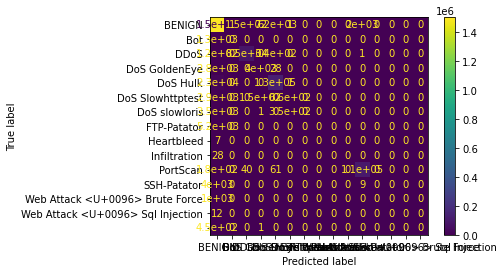

In [47]:
a = ConfusionMatrixDisplay(cm, display_labels = output_label)
a.plot()

In [43]:
pd.unique(data.iloc[:, 76])

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack <U+0096> Brute Force', 'Web Attack <U+0096> XSS',
       'Web Attack <U+0096> Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [ ]:
loaded_test_pred = loaded_model.predict(data_test)

In [ ]:
classes = np.argmax(loaded_test_pred, axis = 1)
print(classes)

[ 4  0  0 ... 10  0  0]


In [ ]:
print(model.metrics_names)

['loss', 'accuracy']


In [ ]:
score = loaded_model.evaluate(data_test, y_test, verbose=0)
score

[0.09580348432064056, 0.9712134003639221]

In [ ]:
loaded_score = loaded_model.evaluate(data_test, y_test, verbose = 0)
loaded_score

[0.09519772231578827, 0.9710807800292969]

In [76]:
recall_score(splitted_y_test, test_pred, average = None)

array([0.99379842, 0.        , 0.99445153, 0.59491079, 0.85266311,
       0.19470491, 0.        , 0.        , 0.        , 0.        ,
       0.99749321, 0.        , 0.        , 0.        , 0.        ])

In [73]:
precision_score(splitted_y_test, test_pred, average = None, zero_division = 0)

array([0.9715731 , 0.        , 0.99765503, 0.96581197, 0.94526975,
       0.66729679, 0.        , 0.        , 0.        , 0.        ,
       0.98083659, 0.        , 0.        , 0.        , 0.        ])

In [78]:
f1_score(splitted_y_test, test_pred, average = None)

array([0.98256009, 0.        , 0.9960507 , 0.73628959, 0.89658147,
       0.30145175, 0.        , 0.        , 0.        , 0.        ,
       0.98909478, 0.        , 0.        , 0.        , 0.        ])

In [74]:
output_label

['BENIGN',
 'Bot',
 'DDoS',
 'DoS GoldenEye',
 'DoS Hulk',
 'DoS Slowhttptest',
 'DoS slowloris',
 'FTP-Patator',
 'Heartbleed',
 'Infiltration',
 'PortScan',
 'SSH-Patator',
 'Web Attack Brute Force',
 'Web Attack Sql Injection',
 'Web Attack XSS']

In [14]:
output_label = ['BENIGN',
 'Bot',
 'DDoS',
 'DoS GoldenEye',
 'DoS Hulk',
 'DoS Slowhttptest',
 'DoS slowloris',
 'FTP-Patator',
 'Heartbleed',
 'Infiltration',
 'PortScan',
 'SSH-Patator',
 'Web Attack Brute Force',
 'Web Attack Sql Injection',
 'Web Attack XSS']

In [15]:
from sklearn.metrics import classification_report
print(classification_report(splitted_y_test, test_pred, target_names = output_label))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  BENIGN       0.97      0.99      0.98    757102
                     Bot       0.00      0.00      0.00       629
                    DDoS       1.00      0.99      1.00     42629
           DoS GoldenEye       0.96      0.59      0.74      3466
                DoS Hulk       0.95      0.85      0.90     76688
        DoS Slowhttptest       0.62      0.17      0.27      1793
           DoS slowloris       0.00      0.00      0.00      1939
             FTP-Patator       0.00      0.00      0.00      2641
              Heartbleed       0.00      0.00      0.00         4
            Infiltration       0.00      0.00      0.00        12
                PortScan       0.98      1.00      0.99     53023
             SSH-Patator       0.00      0.00      0.00      1983
  Web Attack Brute Force       0.00      0.00      0.00       479
Web Attack Sql Injection       0.00      0.00      0.00         8
         